In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
print(sns.__version__)
import matplotlib.pyplot as plt

0.9.0


In [2]:
pip install--upgrade seaborn


The following command must be run outside of the IPython shell:

    $ pip install--upgrade seaborn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


# Load dataset

In [3]:
df = pd.read_csv('big_titanic.csv')

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,2,female,21.2,1,1,31.92,S
1,2,1,2,male,60.0,0,1,9.40,S
2,3,1,1,male,53.3,0,1,3.89,Q
3,4,0,3,female,40.2,1,0,10.54,C
4,5,0,3,male,25.2,2,0,57.33,C


# Basic information

In [4]:
print('shape:',df.shape)

shape: (10000, 9)


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.369700,2.329500,29.99556,0.501400,0.300100,39.557349
std,2886.89568,0.482748,0.832586,13.81251,0.711793,0.546324,39.122942
min,1.00000,0.000000,1.000000,0.00000,0.000000,0.000000,0.010000
25%,2500.75000,0.000000,2.000000,20.30000,0.000000,0.000000,11.600000
50%,5000.50000,0.000000,3.000000,30.00000,0.000000,0.000000,27.870000
75%,7500.25000,1.000000,3.000000,39.50000,1.000000,1.000000,55.272500
max,10000.00000,1.000000,3.000000,80.00000,5.000000,4.000000,359.520000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  10000 non-null  int64  
 1   Survived     10000 non-null  int64  
 2   Pclass       10000 non-null  int64  
 3   Sex          10000 non-null  object 
 4   Age          10000 non-null  float64
 5   SibSp        10000 non-null  int64  
 6   Parch        10000 non-null  int64  
 7   Fare         10000 non-null  float64
 8   Embarked     10000 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 703.2+ KB


In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### We have no null values in this dataset

# Target variable distribution

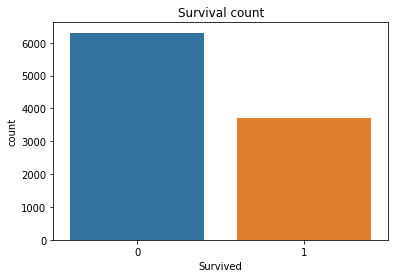

In [8]:
sns.countplot(x = 'Survived', data = df)
plt.title("Survival count")
plt.show()

# Pclass distribution and survival

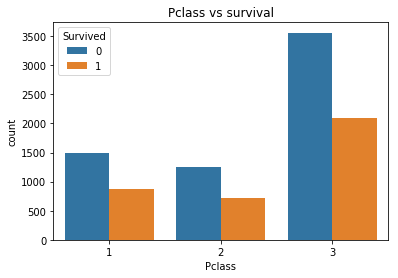

In [9]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)
plt.title("Pclass vs survival")
plt.show()

##1st class passengers had the highest survival rate.
##3rd class passengers faced the highest number of deaths.

# Sex vs Survival

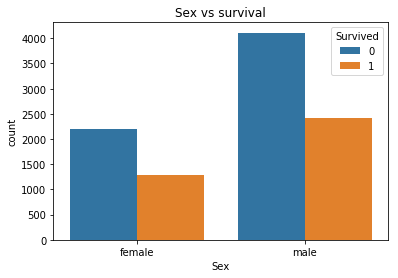

In [10]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.title("Sex vs survival")
plt.show()

##Females had a significantly higher survival rate than males.

# Age distribution 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


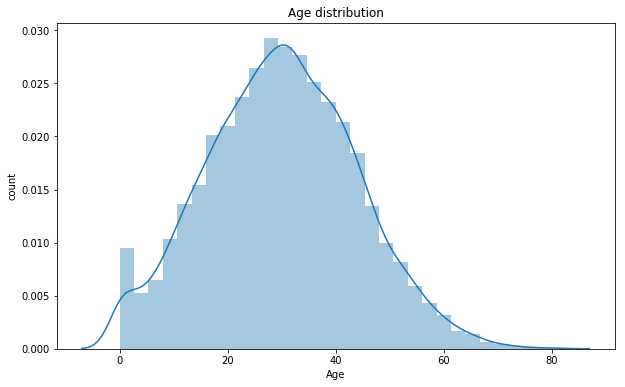

In [14]:
plt.figure(figsize=(10,6))
sns.distplot(df['Age'],bins = 30, kde = True)
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

##Most passengers were between 20 and 40 years old.

##Some children and elderly passengers were also present

# Age vs survival

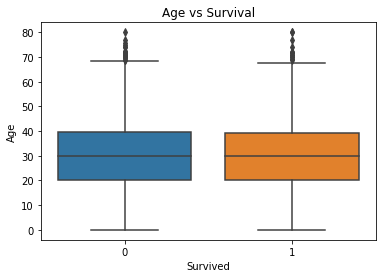

In [15]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()

##Survivors had a slightly lower median age.

##Many children appear to have survived.

# Fare distribution

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


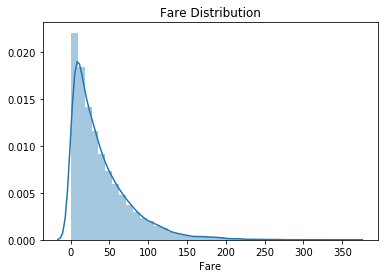

In [17]:
sns.distplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()


##Highly right-skewed, with most passengers paying lower fares.

##Some extreme outliers exist (fare > 300), likely 1st class passengers

# Fare vs survival

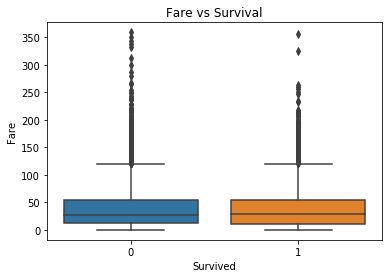

In [18]:
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.show()

##Survivors had a higher fare on average.

##Indicates that passengers who paid more (likely 1st class) had better survival chances.

# SibSp and Parch vs Survival

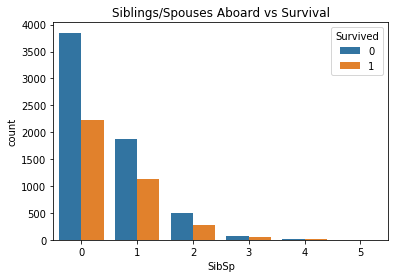

In [19]:
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title("Siblings/Spouses Aboard vs Survival")
plt.show()

##Passengers with 1-2 family members had higher survival rates.

##Larger families (especially 3+ SibSp or Parch) had lower chances

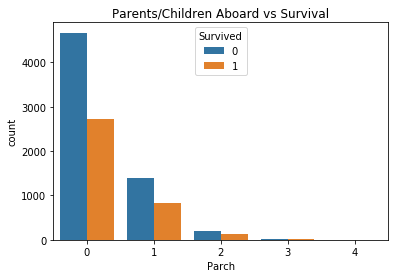

In [20]:
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title("Parents/Children Aboard vs Survival")
plt.show()

# Correlation Heatmap

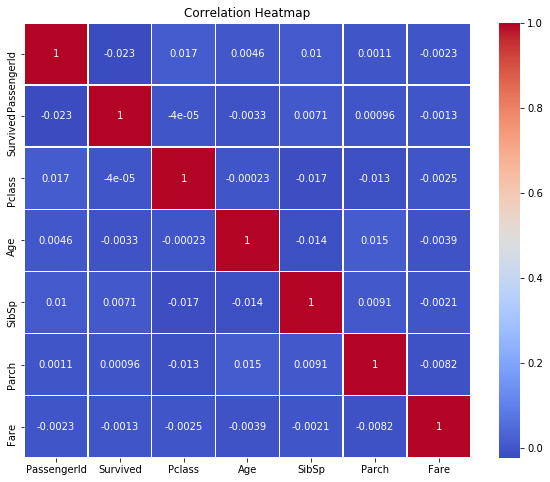

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

#Fare has a positive correlation with survival.

#Pclass has a negative correlation with survival.

#Other features like Age, SibSp, and Parch have weak correlations.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


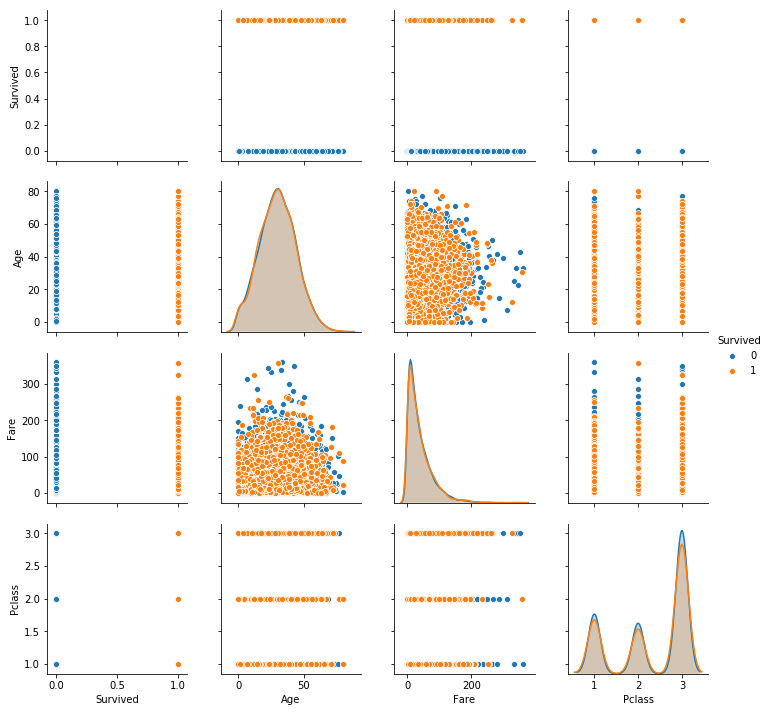

In [24]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived')
plt.show()